TODOs:
- [ ] missing values kinda weird?
- [ ] MLI for Airports_Rail_Access.xlsx ???

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1. Load Data

In [2]:
# Path to the data directory
data_path = "../Data"

# List all xlsx files in the data directory
xlsx_files = [f for f in os.listdir(data_path) if f.endswith(".xlsx")]

xlsx_files

['Airports_Rail_Access.xlsx',
 'Candidate_Rail_Routes.xlsx',
 'Alternative_Rail_Routes_Unidirectional.xlsx',
 'Alternative_Rail_Routes_Bidirectional.xlsx',
 'Airports_Indicators.xlsx']

# 2. Descriptive Analysis of all Datasets

## 2.1 Basic Descriptive Statistics

In [3]:
# Dictionary to hold dataframes
dataframes = {}

for file in xlsx_files:
    file_path = os.path.join(data_path, file)
    if file == "Airports_Rail_Access.xlsx":
        df = pd.read_excel(file_path, header=1, sheet_name=0)  # multi-index columns
        header1 = df.iloc[0]
        header2 = df.iloc[1]
        
    else:
        df = pd.read_excel(file_path, sheet_name=0)  # only 1 sheet per file
    dataframes[file] = df
    print(f"Loaded: {file} — Shape: {df.shape} - Missing values: {df.isnull().sum().sum()}")

Loaded: Airports_Rail_Access.xlsx — Shape: (318, 25) - Missing values: 309
Loaded: Candidate_Rail_Routes.xlsx — Shape: (8612, 11) - Missing values: 3172
Loaded: Alternative_Rail_Routes_Unidirectional.xlsx — Shape: (7425, 30) - Missing values: 27010
Loaded: Alternative_Rail_Routes_Bidirectional.xlsx — Shape: (3814, 16) - Missing values: 5148
Loaded: Airports_Indicators.xlsx — Shape: (58, 10) - Missing values: 0


### 2.1.1 Helper Function to Describe a Dataset

In [4]:
# Helper function to describe a dataset fully
def describe_dataset(df, name="Dataset"):
    print(f"\n===== {name} =====\n")

    # -----------------------------
    # 1. Basic Info
    # -----------------------------
    print("▶ Shape:")
    print(df.shape)

    print("\n▶ Data Types:")
    print(df.dtypes)

    print("\n▶ Missing Values:")
    print(df.isna().sum())

    print("\n▶ Number of Duplicated Rows:")
    print(df.duplicated().sum())

    # -----------------------------
    # 2. Statistical Summary
    # -----------------------------
    print("\n▶ Statistical Summary:")
    display(df.describe(include="all"))

    # -----------------------------
    # 3. Missing Data Heatmap
    # -----------------------------
    print("\n▶ Missing Data Heatmap:")
    plt.figure(figsize=(8,4))
    sns.heatmap(df.isna(), cbar=False)
    plt.title(f"Missing Data Heatmap – {name}")
    plt.show()

    # -----------------------------
    # 4. Correlation Matrix (Numeric)
    # -----------------------------
    numeric_df = df.select_dtypes(include=np.number)

    if numeric_df.shape[1] > 1:
        print("\n▶ Correlation Matrix:")
        display(numeric_df.corr())

        plt.figure(figsize=(8,5))
        sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="Blues")
        plt.title(f"Correlation Heatmap – {name}")
        plt.show()
    else:
        print("\n▶ Not enough numeric variables for a correlation matrix.")

    # -----------------------------
    # 5. Histograms for numeric variables
    # -----------------------------
    if numeric_df.shape[1] > 0:
        print("\n▶ Histograms for Numeric Variables:")
        numeric_df.hist(figsize=(12,8), bins=20)
        plt.tight_layout()
        plt.show()

    # -----------------------------
    # 6. Boxplots for numeric variables
    # -----------------------------
    if numeric_df.shape[1] > 0:
        print("\n▶ Boxplots for Numeric Variables:")
        for column in numeric_df.columns:
            plt.figure(figsize=(6, 2))
            sns.boxplot(x=df[column])
            plt.title(f"Boxplot – {column}")
            plt.show()

    # -----------------------------
    # 7. Value counts for categorical variables
    # -----------------------------
    categorical_df = df.select_dtypes(exclude=np.number)

    if categorical_df.shape[1] > 0:
        print("\n▶ Value Counts for Categorical Variables:")
        for column in categorical_df.columns:
            print(f"\nVariable: {column}")
            print(df[column].value_counts(dropna=False))
    else:
        print("\n▶ No categorical variables found.")


## 2.2 Airports_Indicators.xlsx


===== Airports_Indicators.xlsx =====

▶ Shape:
(58, 10)

▶ Data Types:
Airport                   object
IATA Code                 object
Latitude                 float64
Longitude                float64
Potential Passengers       int64
Total Passengers           int64
Connecting Passengers      int64
Service ARISP            float64
Theoretical ARISP        float64
Delta ARISP              float64
dtype: object

▶ Missing Values:
Airport                  0
IATA Code                0
Latitude                 0
Longitude                0
Potential Passengers     0
Total Passengers         0
Connecting Passengers    0
Service ARISP            0
Theoretical ARISP        0
Delta ARISP              0
dtype: int64

▶ Number of Duplicated Rows:
0

▶ Statistical Summary:


,Airport,IATA Code,Latitude,Longitude,Potential Passengers,Total Passengers,Connecting Passengers,Service ARISP,Theoretical ARISP,Delta ARISP
count,58,58,58.000000,58.000000,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01
unique,58,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Aalborg Airport,AAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,49.224818,10.284658,2.012450e+06,1.515504e+07,4.326045e+06,5.009061e+05,8.030926e+05,3.021865e+05
std,NaN,NaN,5.962397,8.213758,3.470306e+06,1.602023e+07,5.821703e+06,1.010985e+06,1.587815e+06,5.926990e+05
min,NaN,NaN,36.678545,-6.064050,9.600000e+01,1.460470e+05,9.671000e+03,0.000000e+00,0.000000e+00,-3.389497e+04
25%,NaN,NaN,45.795296,4.827758,2.429600e+04,1.151565e+06,4.204478e+05,4.772020e+03,7.762903e+03,3.104301e+03
50%,NaN,NaN,50.277127,10.459842,3.668635e+05,9.911437e+06,1.928610e+06,7.455793e+04,1.302197e+05,5.780261e+04
75%,NaN,NaN,52.432262,15.346914,2.745792e+06,2.370087e+07,5.580579e+06,4.360713e+05,7.534728e+05,3.425787e+05



▶ Missing Data Heatmap:


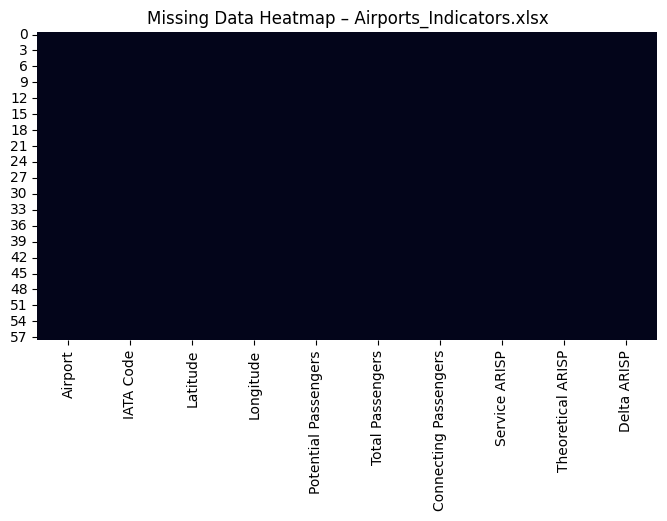


▶ Correlation Matrix:


,Latitude,Longitude,Potential Passengers,Total Passengers,Connecting Passengers,Service ARISP,Theoretical ARISP,Delta ARISP
Latitude,1.000000,0.163835,-0.006027,-0.091548,-0.025896,-0.026878,-0.013974,0.008410
Longitude,0.163835,1.000000,-0.164071,-0.339808,-0.240296,-0.229090,-0.220187,-0.199105
Potential Passengers,-0.006027,-0.164071,1.000000,0.803686,0.942141,0.975667,0.972923,0.942193
Total Passengers,-0.091548,-0.339808,0.803686,1.000000,0.920602,0.787609,0.795351,0.787263
Connecting Passengers,-0.025896,-0.240296,0.942141,0.920602,1.000000,0.937811,0.946599,0.936245
Service ARISP,-0.026878,-0.229090,0.975667,0.787609,0.937811,1.000000,0.994219,0.957740
Theoretical ARISP,-0.013974,-0.220187,0.972923,0.795351,0.946599,0.994219,1.000000,0.983086
Delta ARISP,0.008410,-0.199105,0.942193,0.787263,0.936245,0.957740,0.983086,1.000000


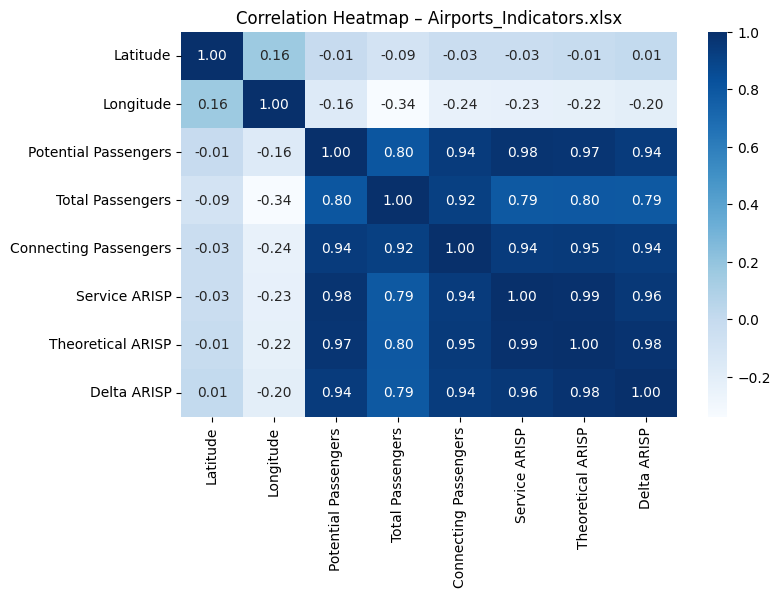


▶ Histograms for Numeric Variables:


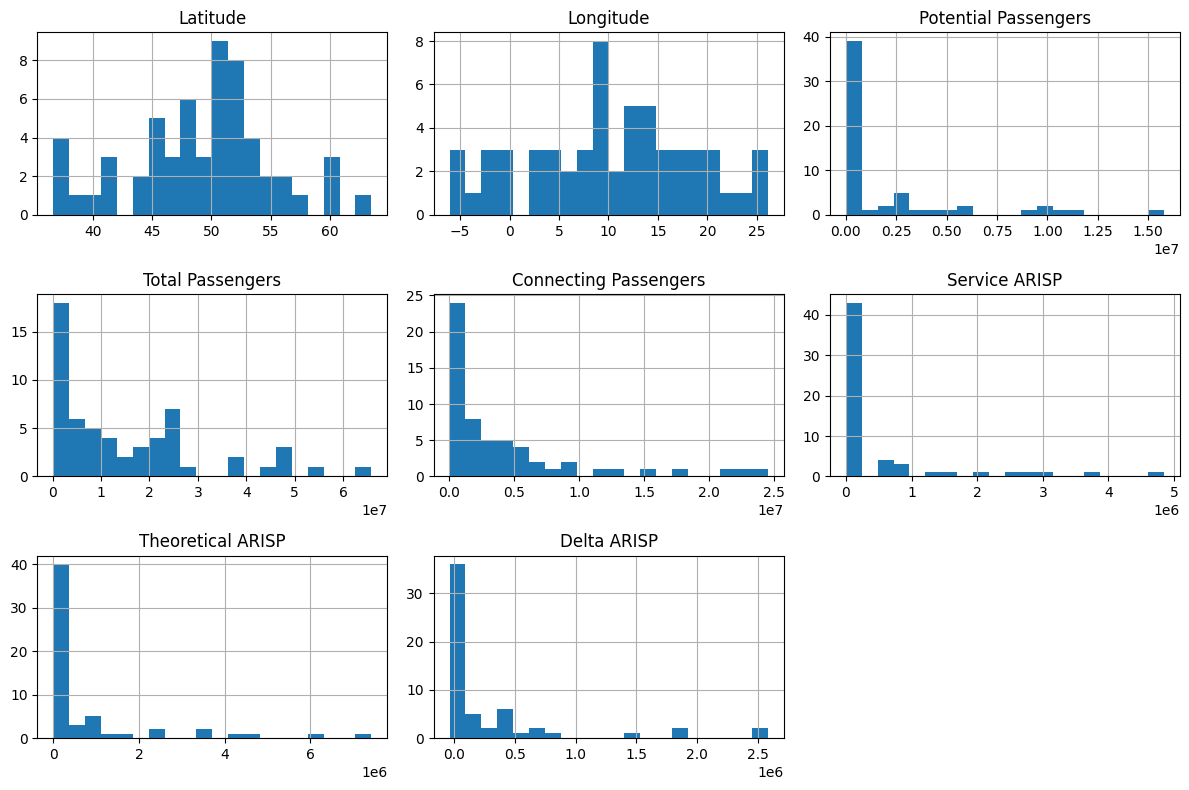


▶ Boxplots for Numeric Variables:


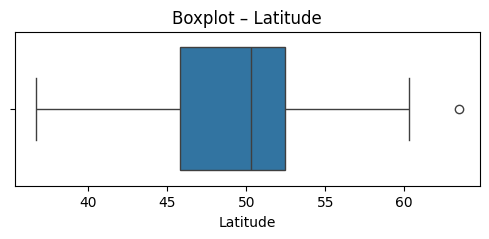

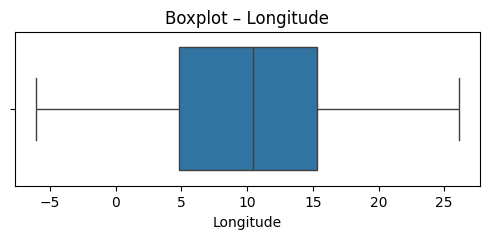

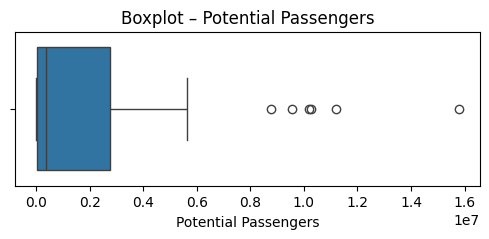

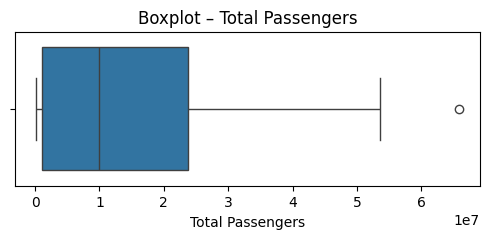

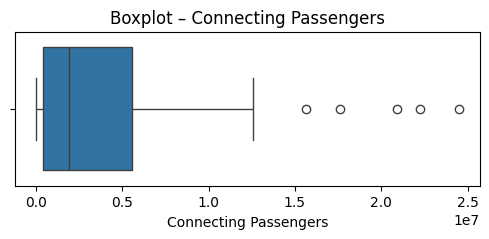

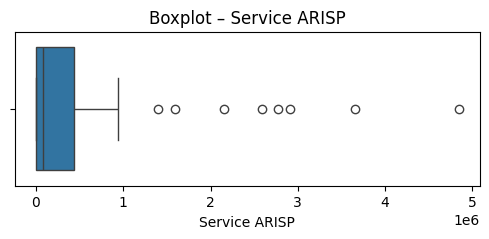

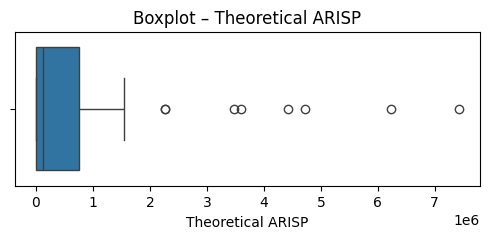

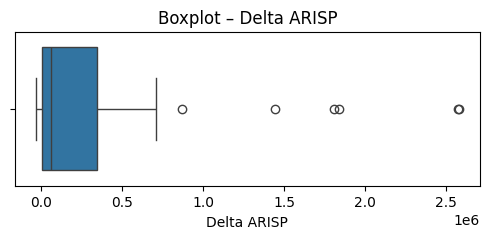


▶ Value Counts for Categorical Variables:

Variable: Airport
Airport
Aalborg Airport                                 1
London Stansted Airport                         1
London Gatwick Airport                          1
London Heathrow Airport                         1
Lublin Airport                                  1
Lyon Saint-Exupéry Airport                      1
Madrid–Barajas Airport                          1
Manchester Airport                              1
Munich Airport                                  1
Milan Malpensa International Airport            1
Oslo Airport                                    1
Ostrava Leos Janáček Airport                    1
Bucharest Henri Coandă International Airport    1
Falcone–Borsellino Airport                      1
Stuttgart Airport                               1
Málaga-Costa del Sol Airport                    1
Strasbourg Airport                              1
Szczecin-Goleniów "Solidarność" Airport         1
Turin Airport                 

In [5]:
df = dataframes["Airports_Indicators.xlsx"]
describe_dataset(df, name="Airports_Indicators.xlsx")

## 2.3 Airports_Rail_Access.xlsx


===== Airports_Rail_Access.xlsx =====

▶ Shape:
(318, 25)

▶ Data Types:
Airport                              object
IATA Code                            object
Ptp Passengers                        int64
Spoke Passengers                      int64
Hub Passengers                        int64
Ptp Passengers [%]                  float64
Spoke Passengers [%]                float64
Hub Passengers [%]                  float64
Total Passengers                      int64
Generated Passengers                  int64
Station name                         object
Station address (Signal.eu)          object
Station Coordinates                  object
UIC Code                             object
Through Line                         object
Detour Line                          object
Branch Line                          object
Linked to Line                       object
High-Speed Rail                      object
Long-distance                        object
Regional/suburban                    object
Ci

,Airport,IATA Code,Ptp Passengers,Spoke Passengers,Hub Passengers,Ptp Passengers [%],Spoke Passengers [%],Hub Passengers [%],Total Passengers,Generated Passengers,...,Detour Line,Branch Line,Linked to Line,High-Speed Rail,Long-distance,Regional/suburban,City-Airport Express Train,Train connection to City Station,Metro/Tram/ People Mover,Comments
count,318,318,3.180000e+02,3.180000e+02,3.180000e+02,318.000000,318.000000,318.000000,3.180000e+02,3.180000e+02,...,318,318,318,318,318,318,318,318,318.000000,9
unique,317,317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,3,3,3,3,2,3,64,NaN,9
top,Düsseldorf Airport,DUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-,-,-,-,-,-,-,-,NaN,MetroLink station planned to open in 2035
freq,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,234,234,234,234,234,234,255,255,NaN,1
mean,NaN,NaN,3.508013e+06,7.167471e+05,4.062325e+05,0.803486,0.177438,0.019076,4.630993e+06,4.224760e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.116352,NaN
std,NaN,NaN,6.722529e+06,1.472785e+06,1.700698e+06,0.152214,0.147540,0.046518,9.376213e+06,8.075694e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.321152,NaN
min,NaN,NaN,7.400000e+01,0.000000e+00,0.000000e+00,0.212342,0.000000,0.000000,7.400000e+01,7.400000e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,1.043310e+05,1.475275e+04,3.000000e+00,0.715459,0.072356,0.000018,1.445625e+05,1.445625e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,5.147080e+05,1.175675e+05,1.475500e+03,0.831807,0.145861,0.002694,6.865005e+05,6.850645e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
75%,NaN,NaN,3.008057e+06,6.749088e+05,6.107100e+04,0.918196,0.228543,0.013741,3.939062e+06,3.913768e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN



▶ Missing Data Heatmap:


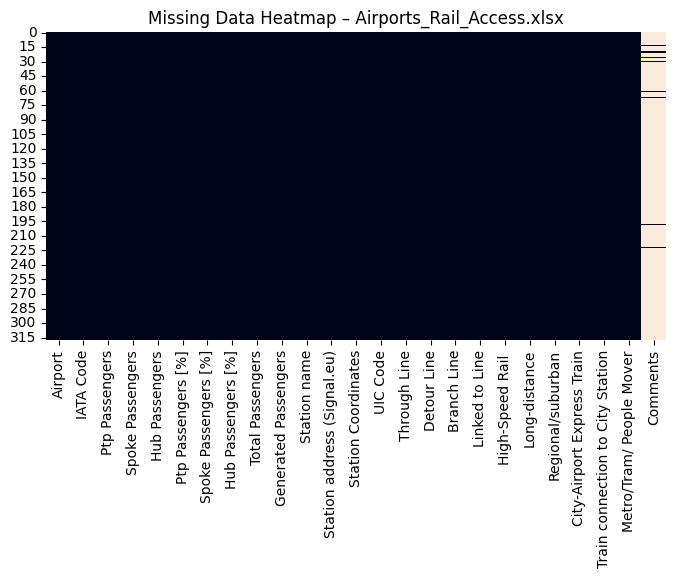


▶ Correlation Matrix:


,Ptp Passengers,Spoke Passengers,Hub Passengers,Ptp Passengers [%],Spoke Passengers [%],Hub Passengers [%],Total Passengers,Generated Passengers,Metro/Tram/ People Mover
Ptp Passengers,1.000000,0.901709,0.693013,-0.100658,-0.099261,0.644200,0.984316,0.996887,0.400834
Spoke Passengers,0.901709,1.000000,0.790045,-0.230826,0.013998,0.710907,0.946883,0.932991,0.361198
Hub Passengers,0.693013,0.790045,1.000000,-0.227328,-0.039406,0.868843,0.802356,0.720974,0.195905
Ptp Passengers [%],-0.100658,-0.230826,-0.227328,1.000000,-0.952309,-0.251738,-0.149661,-0.125888,-0.056831
Spoke Passengers [%],-0.099261,0.013998,-0.039406,-0.952309,1.000000,-0.055575,-0.076117,-0.080076,-0.023646
Hub Passengers [%],0.644200,0.710907,0.868843,-0.251738,-0.055575,1.000000,0.731138,0.665907,0.260961
Total Passengers,0.984316,0.946883,0.802356,-0.149661,-0.076117,0.731138,1.000000,0.992069,0.379659
Generated Passengers,0.996887,0.932991,0.720974,-0.125888,-0.080076,0.665907,0.992069,1.000000,0.399543
Metro/Tram/ People Mover,0.400834,0.361198,0.195905,-0.056831,-0.023646,0.260961,0.379659,0.399543,1.000000


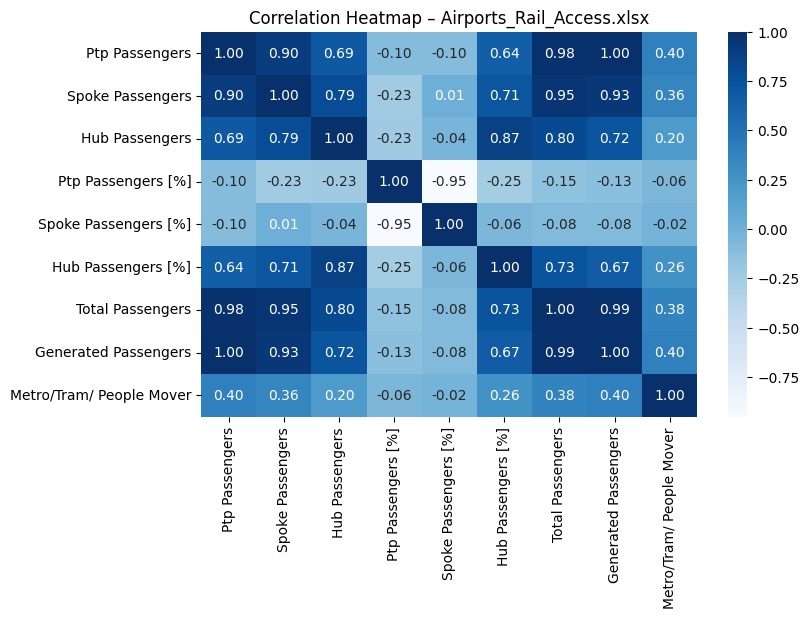


▶ Histograms for Numeric Variables:


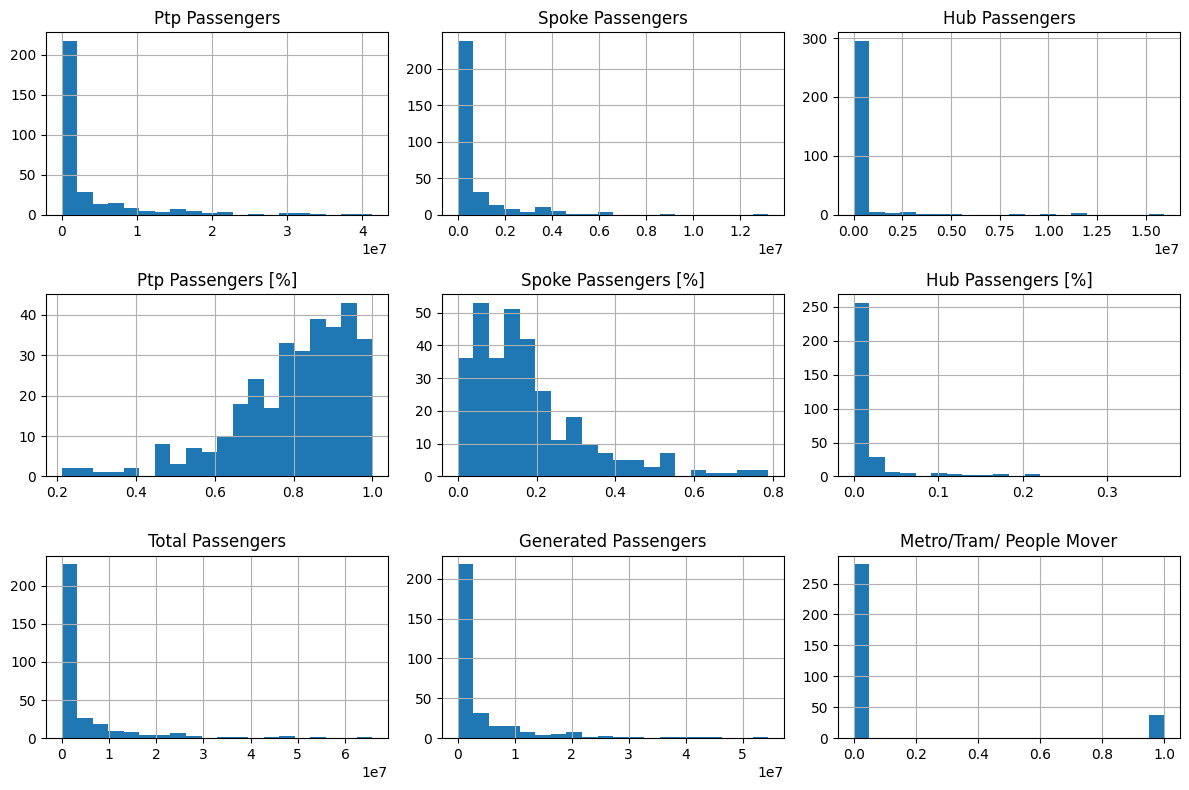


▶ Boxplots for Numeric Variables:


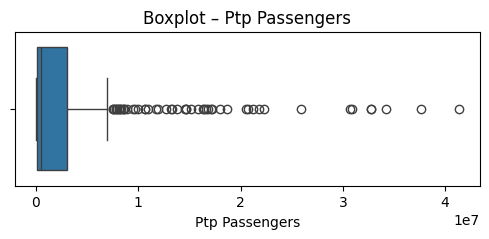

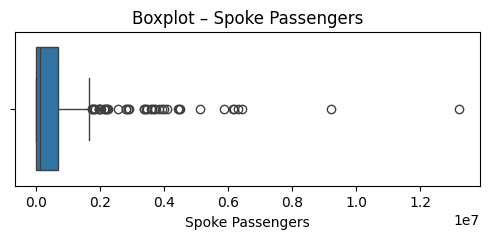

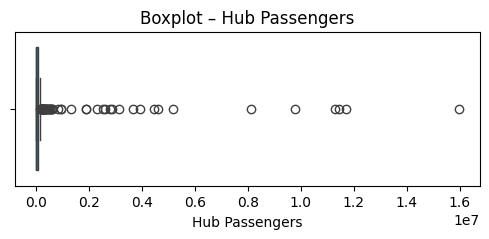

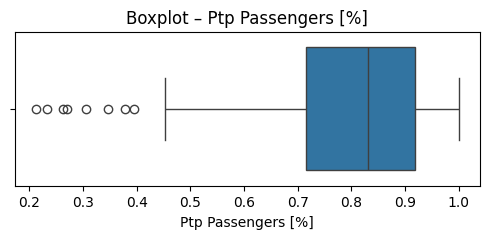

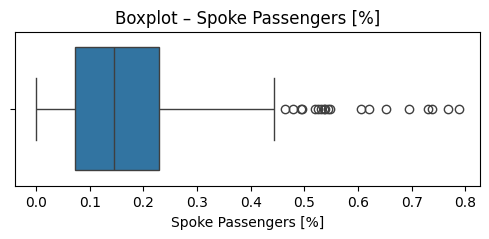

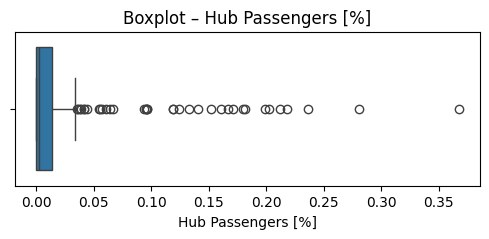

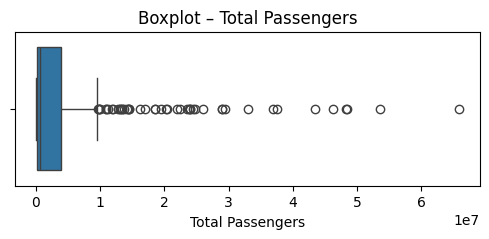

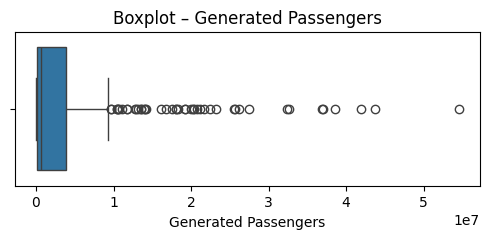

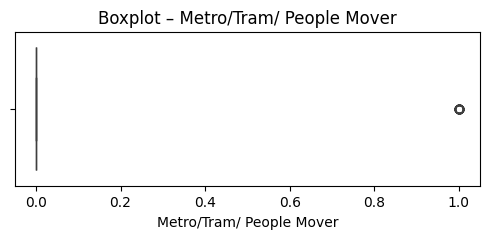


▶ Value Counts for Categorical Variables:

Variable: Airport
Airport
Düsseldorf Airport              2
Frankfurt Airport               1
Tampere-Pirkkala Airport        1
Cuneo International Airport     1
Dundee Airport                  1
                               ..
Girona-Costa Brava Airport      1
Lennart Meri Tallinn Airport    1
Salzburg Airport                1
Santander Airport               1
Odense Airport                  1
Name: count, Length: 317, dtype: int64

Variable: IATA Code
IATA Code
DUS    2
FRA    1
TMP    1
CUF    1
DND    1
      ..
GRO    1
TLL    1
SZG    1
SDR    1
ODE    1
Name: count, Length: 317, dtype: int64

Variable: Station name
Station name
-                                228
Frankfurt(M) Flughafen Fernbf      1
Firenze Santa Maria Novella        1
Entzheim-Aéroport                  1
Aalborg Lufthavn                   1
                                ... 
Bologna Centrale                   1
Manchester Airport                 1
Málaga Aeropuer

In [6]:
df = dataframes["Airports_Rail_Access.xlsx"]
describe_dataset(df, name="Airports_Rail_Access.xlsx")

## 2.4 Alternative_Rail_Routes_Bidirectional.xlsx


===== Alternative_Rail_Routes_Bidirectional.xlsx =====

▶ Shape:
(3814, 16)

▶ Data Types:
Bidirectional Route Name         object
Origin                           object
Destination                      object
Origin Coordinates               object
Destination Coordinates          object
Rail Theoretical Travel Time    float64
Rail Service Travel Time        float64
Air Travel Time                 float64
Valued Air Travel Time          float64
Passenger Flows                   int64
Theoretical ARISP               float64
Service ARISP                   float64
Theoretical Time Difference     float64
Service Time Difference         float64
Theoretical Time Increase       float64
Service Time Increase           float64
dtype: object

▶ Missing Values:
Bidirectional Route Name           0
Origin                             0
Destination                        0
Origin Coordinates                 0
Destination Coordinates            0
Rail Theoretical Travel Time     145
Rail Service 

,Bidirectional Route Name,Origin,Destination,Origin Coordinates,Destination Coordinates,Rail Theoretical Travel Time,Rail Service Travel Time,Air Travel Time,Valued Air Travel Time,Passenger Flows,Theoretical ARISP,Service ARISP,Theoretical Time Difference,Service Time Difference,Theoretical Time Increase,Service Time Increase
count,3814,3814,3814,3814,3814,3669.000000,2672.000000,3814.000000,3814.000000,3814.000000,3669.000000,2672.000000,3669.000000,2672.000000,3669.000000,2672.000000
unique,3814,239,286,239,286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,A Coruña-AGP,AGP,STN,"36.677749,-4.490162","51.889260,0.262154",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,149,125,149,125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,813.115696,960.416783,126.690067,205.237908,29901.614840,12396.519915,10654.901796,-608.744220,-775.348004,279.280156,396.953143
std,NaN,NaN,NaN,NaN,NaN,545.448511,541.960755,45.428213,73.593705,64479.668828,34712.397546,28774.821147,494.115529,494.956231,198.164879,190.191318
min,NaN,NaN,NaN,NaN,NaN,55.000000,72.239981,32.310987,52.343799,1.000000,0.115000,0.105257,-2705.971280,-3066.346429,-35.552733,-2.777940
25%,NaN,NaN,NaN,NaN,NaN,399.262363,539.802579,91.602388,148.395868,1489.250000,409.891714,304.175628,-837.030255,-1035.902527,145.700045,265.104028
50%,NaN,NaN,NaN,NaN,NaN,668.503265,859.030815,121.099374,196.180986,5316.000000,1544.166346,1267.198736,-461.439997,-675.040919,225.004692,366.562296
75%,NaN,NaN,NaN,NaN,NaN,1081.685358,1264.176233,156.459593,253.464541,21474.000000,6568.368366,6325.624665,-240.942738,-392.541216,351.926674,499.324552



▶ Missing Data Heatmap:


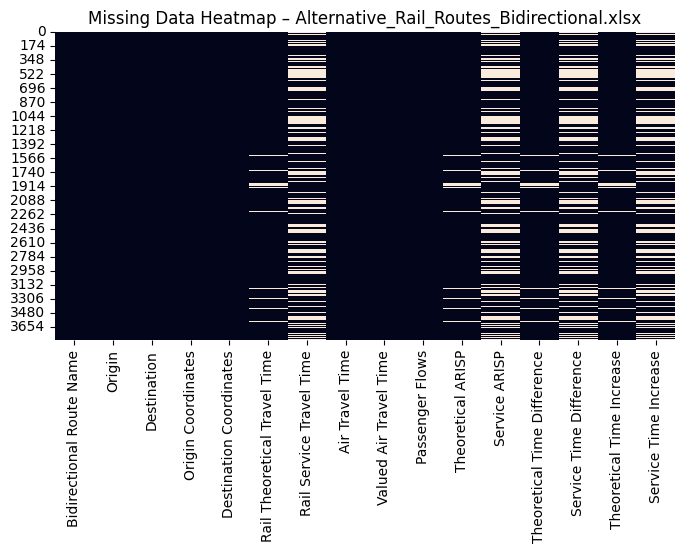


▶ Correlation Matrix:


,Rail Theoretical Travel Time,Rail Service Travel Time,Air Travel Time,Valued Air Travel Time,Passenger Flows,Theoretical ARISP,Service ARISP,Theoretical Time Difference,Service Time Difference,Theoretical Time Increase,Service Time Increase
Rail Theoretical Travel Time,1.000000,0.946515,0.730053,0.730053,-0.194586,-0.258953,-0.272242,-0.994770,-0.942562,0.803386,0.782871
Rail Service Travel Time,0.946515,1.000000,0.790188,0.790188,-0.263431,-0.299836,-0.299575,-0.919168,-0.997116,0.669533,0.819374
Air Travel Time,0.730053,0.790188,1.000000,1.000000,-0.230305,-0.240565,-0.247013,-0.656429,-0.741397,0.259548,0.349373
Valued Air Travel Time,0.730053,0.790188,1.000000,1.000000,-0.230305,-0.240565,-0.247013,-0.656429,-0.741397,0.259548,0.349373
Passenger Flows,-0.194586,-0.263431,-0.230305,-0.230305,1.000000,0.893471,0.895592,0.180837,0.258038,-0.128519,-0.222452
Theoretical ARISP,-0.258953,-0.299836,-0.240565,-0.240565,0.893471,1.000000,0.967862,0.249899,0.297769,-0.237789,-0.306038
Service ARISP,-0.272242,-0.299575,-0.247013,-0.247013,0.895592,0.967862,1.000000,0.260469,0.297437,-0.227127,-0.310861
Theoretical Time Difference,-0.994770,-0.919168,-0.656429,-0.656429,0.180837,0.249899,0.260469,1.000000,0.926351,-0.848055,-0.831671
Service Time Difference,-0.942562,-0.997116,-0.741397,-0.741397,0.258038,0.297769,0.297437,0.926351,1.000000,-0.705609,-0.853924
Theoretical Time Increase,0.803386,0.669533,0.259548,0.259548,-0.128519,-0.237789,-0.227127,-0.848055,-0.705609,1.000000,0.878021


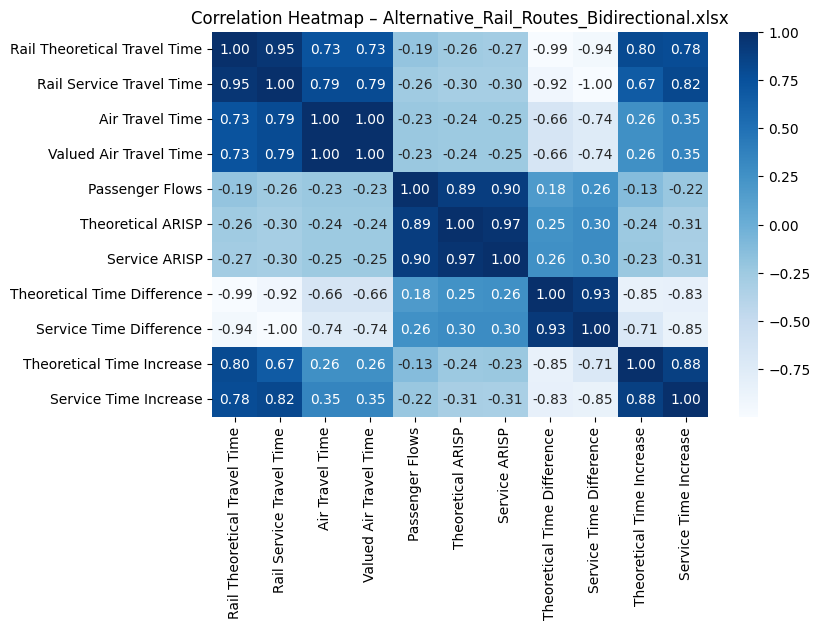


▶ Histograms for Numeric Variables:


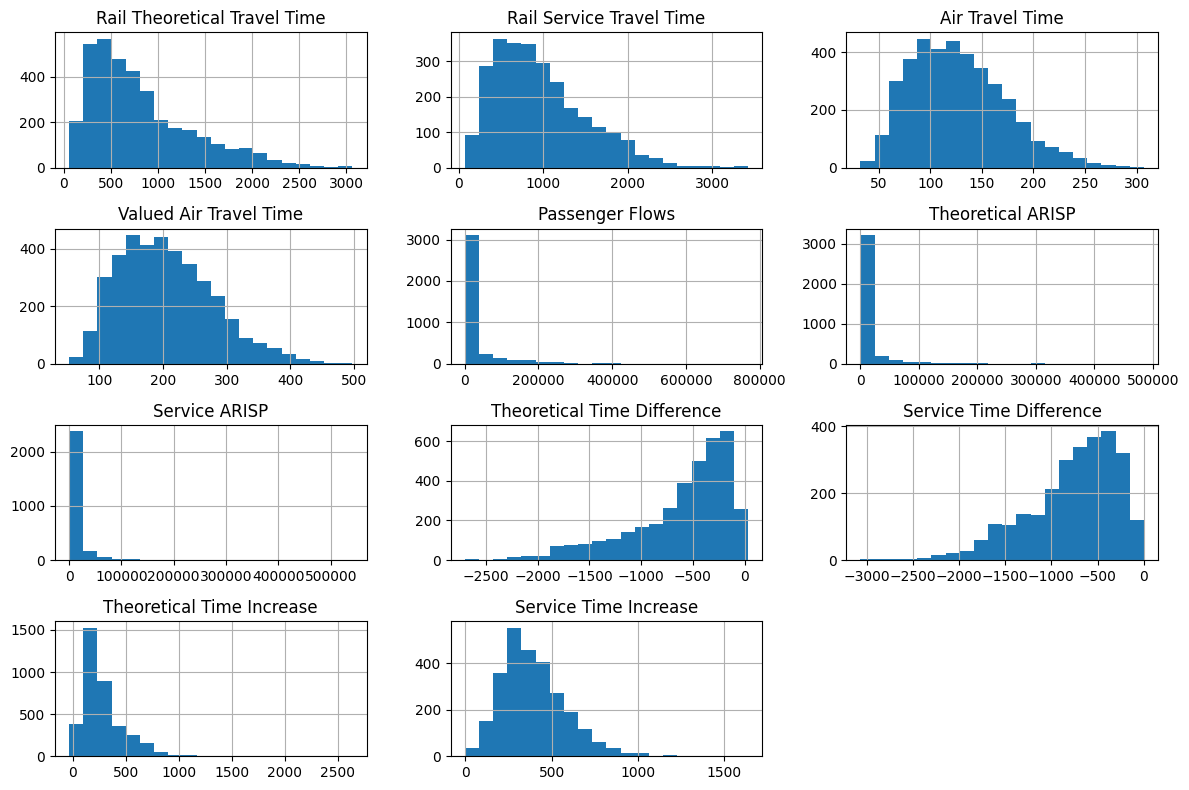


▶ Boxplots for Numeric Variables:


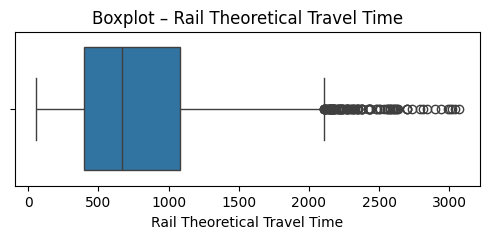

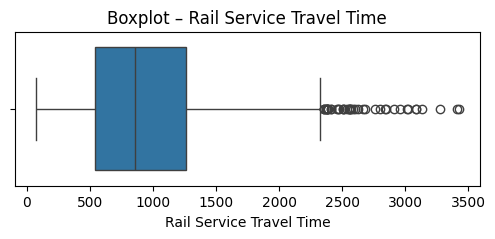

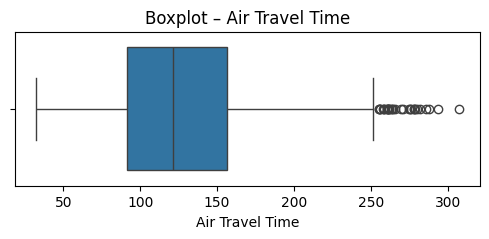

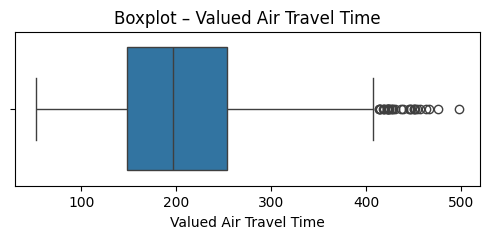

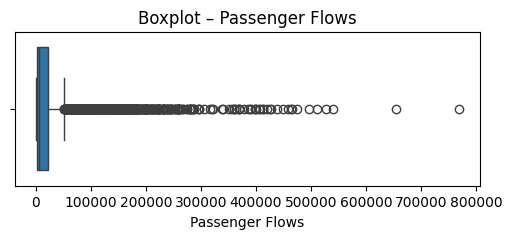

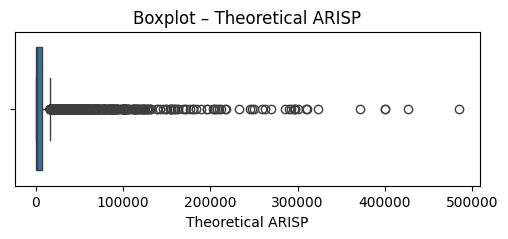

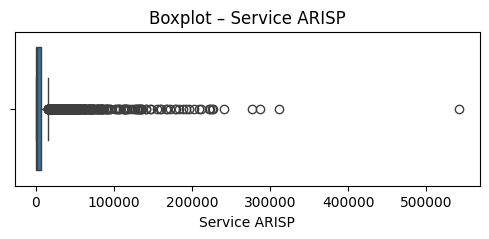

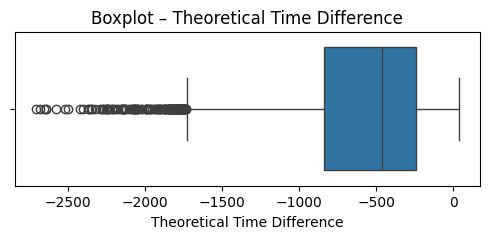

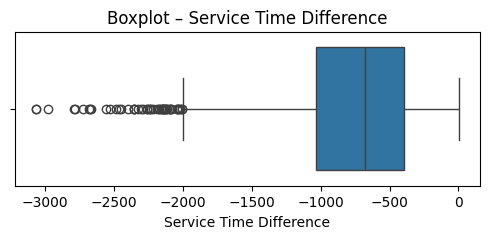

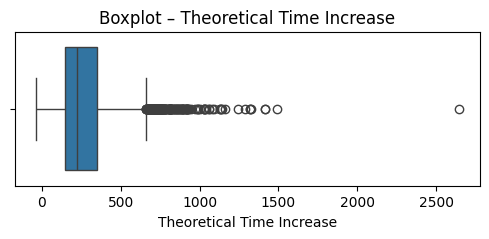

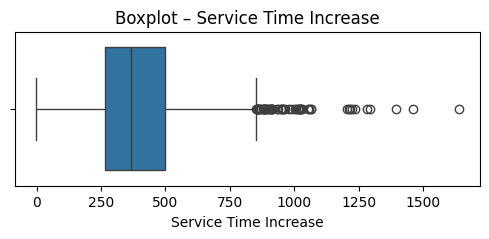


▶ Value Counts for Categorical Variables:

Variable: Bidirectional Route Name
Bidirectional Route Name
A Coruña-AGP     1
GVA-VIE          1
GVA-Rotterdam    1
GVA-SOU          1
GVA-STN          1
                ..
Bari-PMO         1
Bari-STN         1
Bari-STR         1
Bari-TRN         1
ZRH-Zagreb       1
Name: count, Length: 3814, dtype: int64

Variable: Origin
Origin
AGP         149
AMS         147
BCN         143
ARN         129
ATH         113
           ... 
Brașov        1
Reus          1
Rodez         1
Salzburg      1
ZRH           1
Name: count, Length: 239, dtype: int64

Variable: Destination
Destination
STN             125
ZRH             117
VIE             114
WAW             108
MUC              85
               ... 
Bolzano           1
Hull              1
Linköping         1
Norwich           1
Zielona Góra      1
Name: count, Length: 286, dtype: int64

Variable: Origin Coordinates
Origin Coordinates
36.677749,-4.490162                      149
52.309523,4.762181 

In [7]:
df = dataframes["Alternative_Rail_Routes_Bidirectional.xlsx"]
describe_dataset(df, name="Alternative_Rail_Routes_Bidirectional.xlsx")

## 2.5 Alternative_Rail_Routes_Unidirectional.xlsx


===== Alternative_Rail_Routes_Unidirectional.xlsx =====

▶ Shape:
(7425, 30)

▶ Data Types:
Route Name                          object
Origin                              object
Destination                         object
Origin Coordinates                  object
Destination Coordinates             object
Rail Theoretical Travel Time       float64
Rail Service Travel Time           float64
Air Travel Time                    float64
Valued Air Travel Time             float64
Valued Air Travel Time_MIN         float64
Valued Air Travel Time_MAX         float64
Passenger Flows                      int64
Theoretical ARISP                  float64
Service ARISP                      float64
Theoretical ARISP_MIN              float64
Service ARISP_MIN                  float64
Theoretical ARISP_MAX              float64
Service ARISP_MAX                  float64
Theoretical Time Difference        float64
Service Time Difference            float64
Theoretical Time Difference_MIN    float64
Serv

,Route Name,Origin,Destination,Origin Coordinates,Destination Coordinates,Rail Theoretical Travel Time,Rail Service Travel Time,Air Travel Time,Valued Air Travel Time,Valued Air Travel Time_MIN,...,Theoretical Time Difference_MIN,Service Time Difference_MIN,Theoretical Time Difference_MAX,Service Time Difference_MAX,Theoretical Time Increase,Service Time Increase,Theoretical Time Increase_MIN,Service Time Increase_MIN,Theoretical Time Increase_MAX,Service Time Increase_MAX
count,7425,7425,7425,7425,7425,7183.000000,4966.000000,7425.000000,7425.000000,7425.000000,...,7183.000000,4966.000000,7183.000000,4966.000000,7183.000000,4966.000000,7183.000000,4966.000000,7183.000000,4966.000000
unique,7425,312,313,312,313,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,A Coruña-AGP,London Stansted Airport,London Stansted Airport,"51.889260,0.262154","51.889260,0.262154",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,159,159,159,159,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,814.163024,934.589633,126.494125,204.920482,178.356716,...,-636.359113,-774.587075,-583.396246,-726.926738,280.055598,388.210043,336.659624,460.922177,236.442661,332.185940
std,NaN,NaN,NaN,NaN,NaN,551.826274,524.329145,45.607663,73.884414,64.306804,...,507.270960,483.918589,494.849505,472.371566,202.060082,187.720973,232.154137,215.679416,178.872860,166.179222
min,NaN,NaN,NaN,NaN,NaN,55.000000,71.000000,32.268118,52.274351,45.498047,...,-2869.800000,-3112.708929,-2777.400000,-3020.550000,-37.064071,-12.345679,-27.690635,0.709220,-44.286227,-22.404372
25%,NaN,NaN,NaN,NaN,NaN,398.000000,526.000000,90.946344,147.333078,128.234346,...,-867.950492,-1030.344434,-801.250000,-970.839494,143.815518,258.074974,180.128468,311.405289,115.836688,216.984403
50%,NaN,NaN,NaN,NaN,NaN,667.000000,835.000000,120.931263,195.908647,170.513081,...,-485.468583,-678.466448,-428.606406,-630.843224,223.447436,355.050950,271.620458,422.824496,186.330517,302.831989
75%,NaN,NaN,NaN,NaN,NaN,1081.000000,1234.500000,156.350975,253.288579,220.454875,...,-261.271739,-400.563509,-219.788885,-365.408774,351.655411,490.316917,418.923238,578.236458,299.826101,422.575631



▶ Missing Data Heatmap:


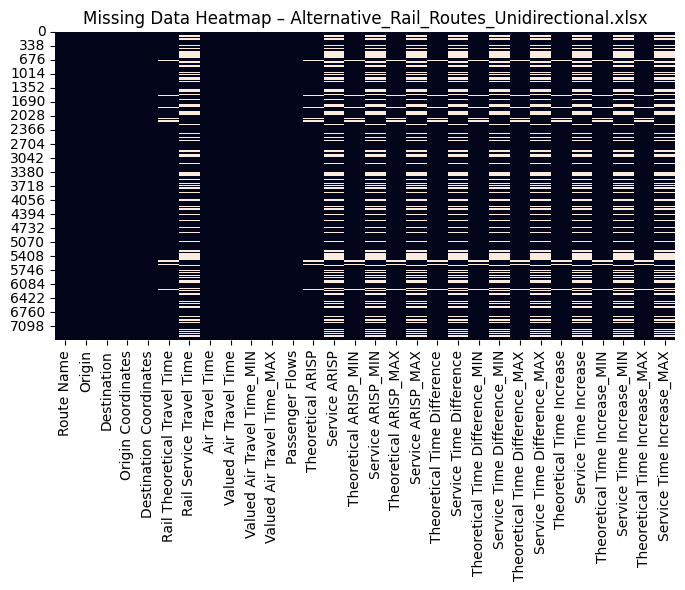


▶ Correlation Matrix:


,Rail Theoretical Travel Time,Rail Service Travel Time,Air Travel Time,Valued Air Travel Time,Valued Air Travel Time_MIN,Valued Air Travel Time_MAX,Passenger Flows,Theoretical ARISP,Service ARISP,Theoretical ARISP_MIN,...,Theoretical Time Difference_MIN,Service Time Difference_MIN,Theoretical Time Difference_MAX,Service Time Difference_MAX,Theoretical Time Increase,Service Time Increase,Theoretical Time Increase_MIN,Service Time Increase_MIN,Theoretical Time Increase_MAX,Service Time Increase_MAX
Rail Theoretical Travel Time,1.000000,0.933562,0.721340,0.721340,0.721340,0.721340,-0.193743,-0.258424,-0.265724,-0.258424,...,-0.996115,-0.929284,-0.993113,-0.926809,0.805777,0.757930,0.805777,0.757930,0.805777,0.757930
Rail Service Travel Time,0.933562,1.000000,0.781060,0.781060,0.781060,0.781060,-0.257604,-0.297186,-0.296139,-0.297186,...,-0.909117,-0.997641,-0.896824,-0.995826,0.641677,0.812629,0.641677,0.812629,0.641677,0.812629
Air Travel Time,0.721340,0.781060,1.000000,1.000000,1.000000,1.000000,-0.228780,-0.239594,-0.239739,-0.239594,...,-0.657548,-0.736348,-0.635228,-0.720801,0.252243,0.323400,0.252243,0.323400,0.252243,0.323400
Valued Air Travel Time,0.721340,0.781060,1.000000,1.000000,1.000000,1.000000,-0.228780,-0.239594,-0.239739,-0.239594,...,-0.657548,-0.736348,-0.635228,-0.720801,0.252243,0.323400,0.252243,0.323400,0.252243,0.323400
Valued Air Travel Time_MIN,0.721340,0.781060,1.000000,1.000000,1.000000,1.000000,-0.228780,-0.239594,-0.239739,-0.239594,...,-0.657548,-0.736348,-0.635228,-0.720801,0.252243,0.323400,0.252243,0.323400,0.252243,0.323400
Valued Air Travel Time_MAX,0.721340,0.781060,1.000000,1.000000,1.000000,1.000000,-0.228780,-0.239594,-0.239739,-0.239594,...,-0.657548,-0.736348,-0.635228,-0.720801,0.252243,0.323400,0.252243,0.323400,0.252243,0.323400
Passenger Flows,-0.193743,-0.257604,-0.228780,-0.228780,-0.228780,-0.228780,1.000000,0.893607,0.890165,0.893607,...,0.181959,0.252700,0.177733,0.250816,-0.126916,-0.213158,-0.126916,-0.213158,-0.126916,-0.213158
Theoretical ARISP,-0.258424,-0.297186,-0.239594,-0.239594,-0.239594,-0.239594,0.893607,1.000000,0.965275,1.000000,...,0.250658,0.295434,0.247647,0.294518,-0.236948,-0.300635,-0.236948,-0.300635,-0.236948,-0.300635
Service ARISP,-0.265724,-0.296139,-0.239739,-0.239739,-0.239739,-0.239739,0.890165,0.965275,1.000000,0.965275,...,0.255773,0.294512,0.251235,0.293669,-0.216588,-0.305355,-0.216588,-0.305355,-0.216588,-0.305355
Theoretical ARISP_MIN,-0.258424,-0.297186,-0.239594,-0.239594,-0.239594,-0.239594,0.893607,1.000000,0.965275,1.000000,...,0.250658,0.295434,0.247647,0.294518,-0.236948,-0.300635,-0.236948,-0.300635,-0.236948,-0.300635


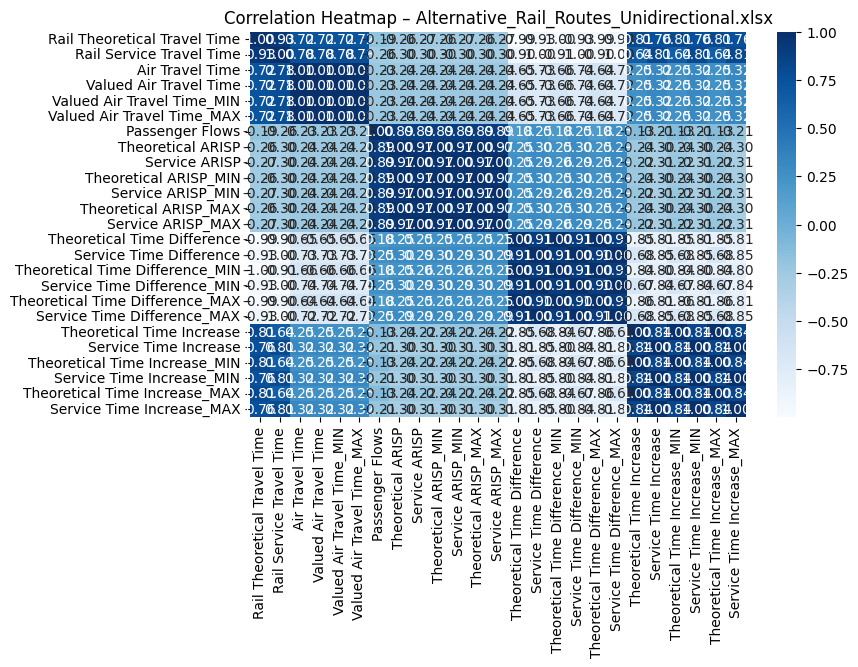


▶ Histograms for Numeric Variables:


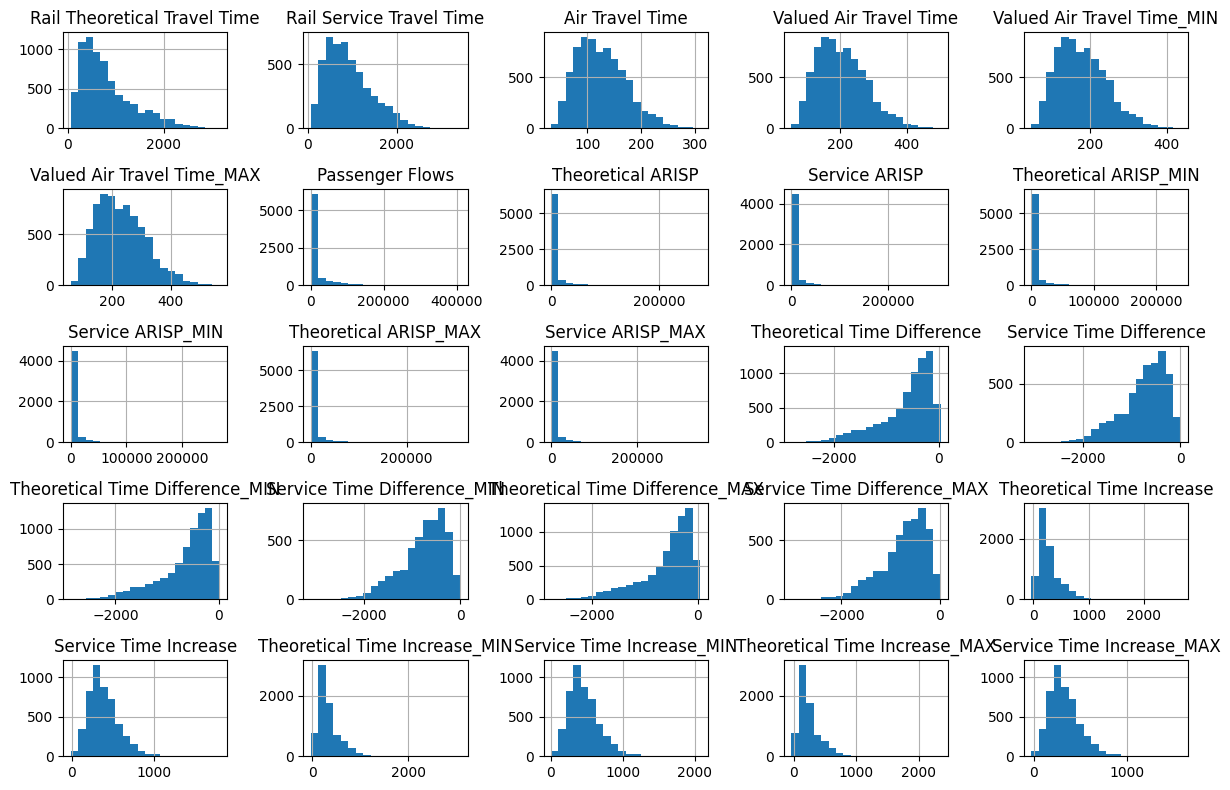


▶ Boxplots for Numeric Variables:


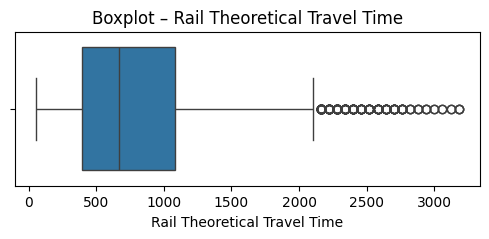

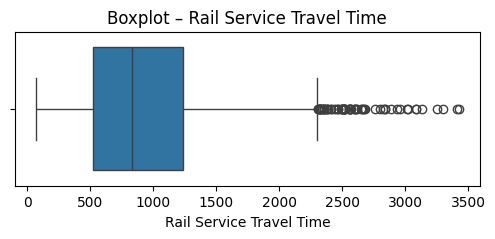

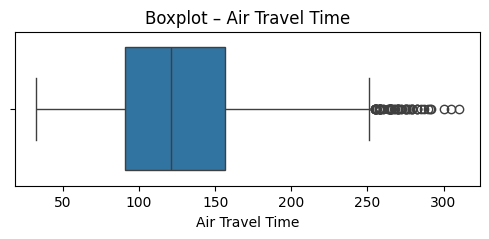

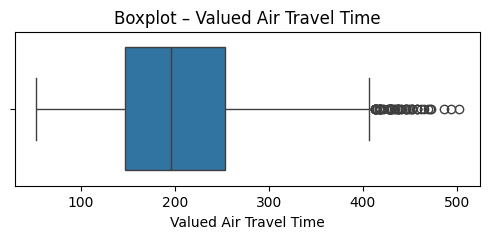

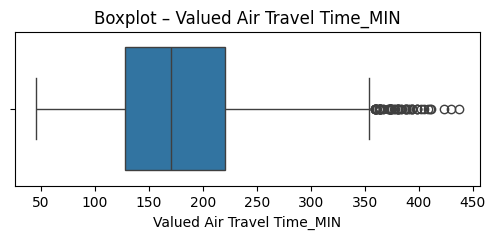

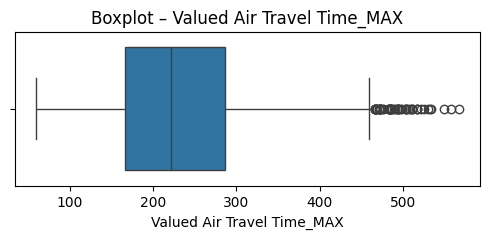

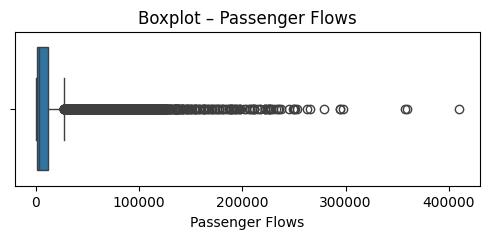

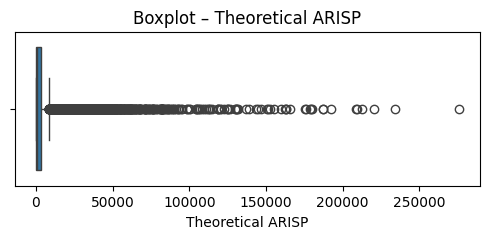

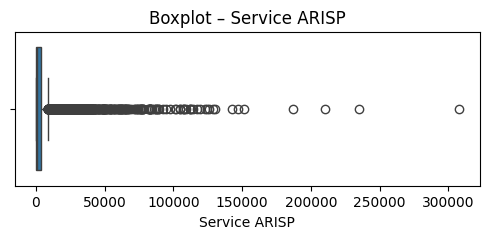

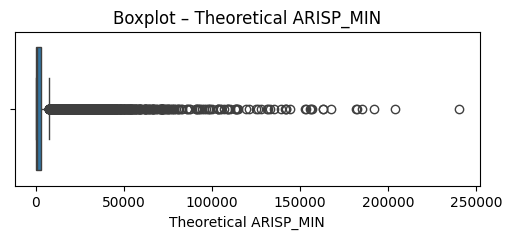

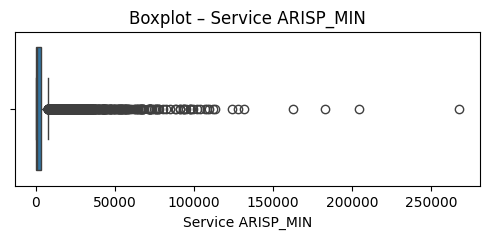

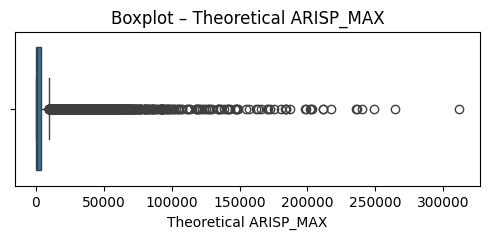

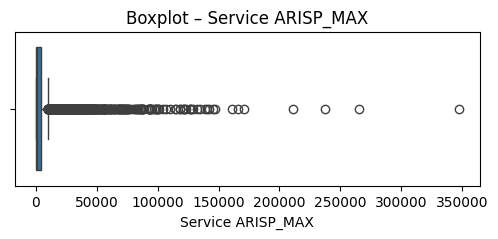

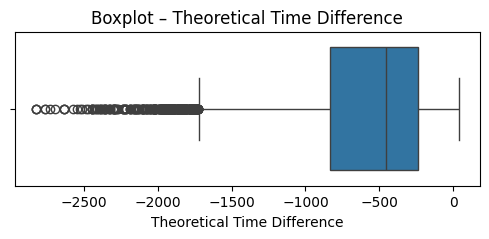

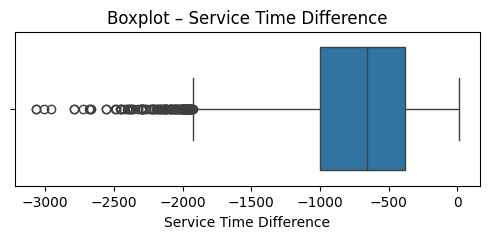

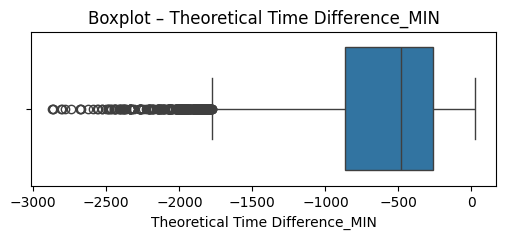

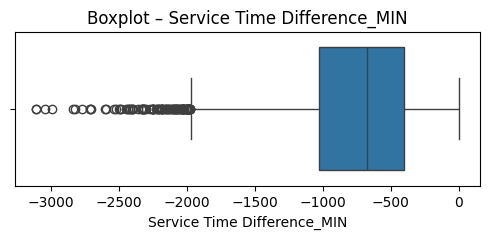

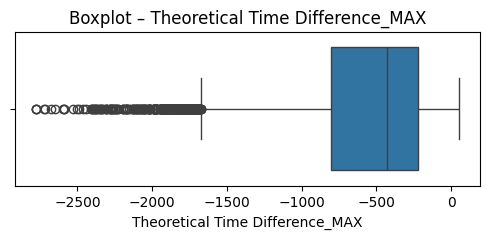

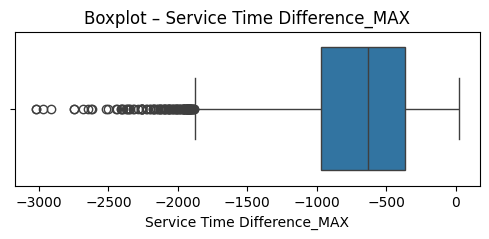

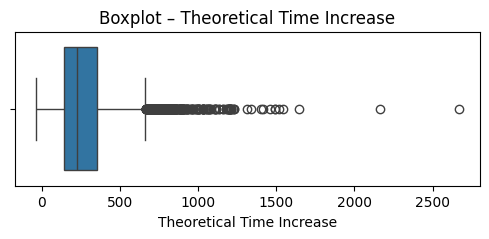

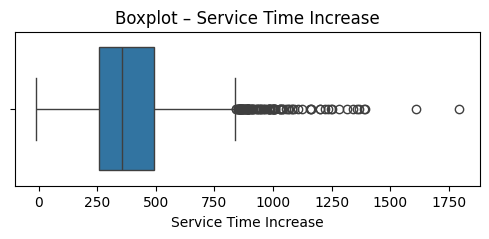

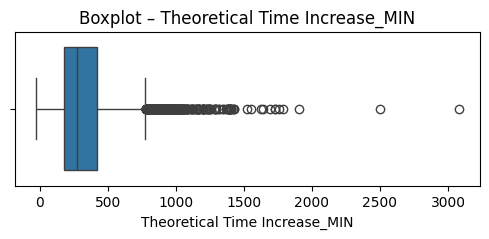

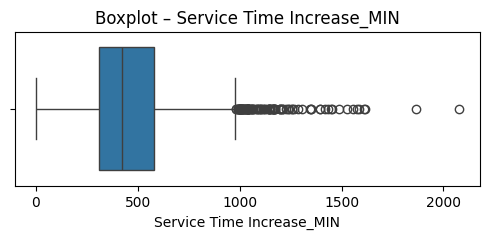

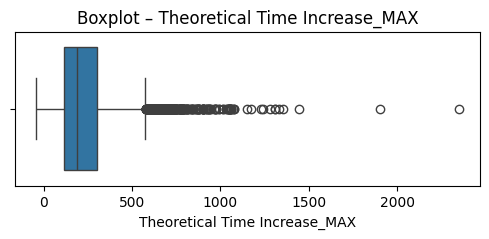

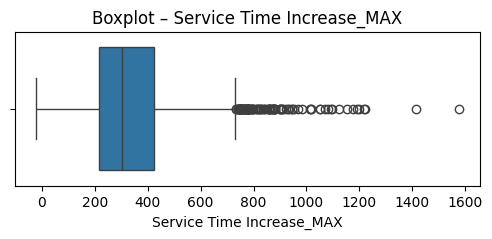


▶ Value Counts for Categorical Variables:

Variable: Route Name
Route Name
A Coruña-AGP      1
Milan-AOI         1
Milan-DUS         1
Milan-CTA         1
Milan-CPH         1
                 ..
Düsseldorf-AMS    1
Düsseldorf-AGP    1
Dundee-LHR        1
Dubrovnik-ZRH     1
Łódź-STN          1
Name: count, Length: 7425, dtype: int64

Variable: Origin
Origin
London Stansted Airport         159
Barcelona-El Prat Airport       151
Amsterdam Airport Schiphol      148
Frankfurt Airport               148
Málaga-Costa del Sol Airport    146
                               ... 
Reggio Calabria                   1
Toulon                            1
León, Spain                       1
Tours                             1
Norwich                           1
Name: count, Length: 312, dtype: int64

Variable: Destination
Destination
London Stansted Airport         159
Barcelona-El Prat Airport       152
Málaga-Costa del Sol Airport    148
Frankfurt Airport               147
Amsterdam Airport Schipho

In [8]:
df = dataframes["Alternative_Rail_Routes_Unidirectional.xlsx"]
describe_dataset(df, name="Alternative_Rail_Routes_Unidirectional.xlsx")

## 2.6 Candidate_Rail_Routes.xlsx


===== Candidate_Rail_Routes.xlsx =====

▶ Shape:
(8612, 11)

▶ Data Types:
Airport OD                       object
Origin                           object
Destination                      object
Origin Coordinates               object
Destination Coordinates          object
Route                            object
Distance and Theoretical Time    object
Theoretical Travel Time          object
Distance                         object
Service Travel Time              object
Mode                             object
dtype: object

▶ Missing Values:
Airport OD                         0
Origin                             0
Destination                        0
Origin Coordinates                 6
Destination Coordinates            6
Route                            790
Distance and Theoretical Time    790
Theoretical Travel Time          790
Distance                         790
Service Travel Time                0
Mode                               0
dtype: int64

▶ Number of Duplicated Rows:
0

,Airport OD,Origin,Destination,Origin Coordinates,Destination Coordinates,Route,Distance and Theoretical Time,Theoretical Travel Time,Distance,Service Travel Time,Mode
count,8612,8612,8612,8606,8606,7822,7822,7822,7822,8612,8612
unique,5720,330,330,325,325,1128,7477,1349,6485,1796,2
top,STN-AAL,London Stansted Airport,London Stansted Airport,"51.889260,0.262154","51.889260,0.262154","Ligne de Combs-la-Ville à Saint-Louis (LGV), L...",-,1900-01-01 01:00:00,-,-,Train
freq,3,179,179,179,179,200,12,108,12,3161,5451



▶ Missing Data Heatmap:


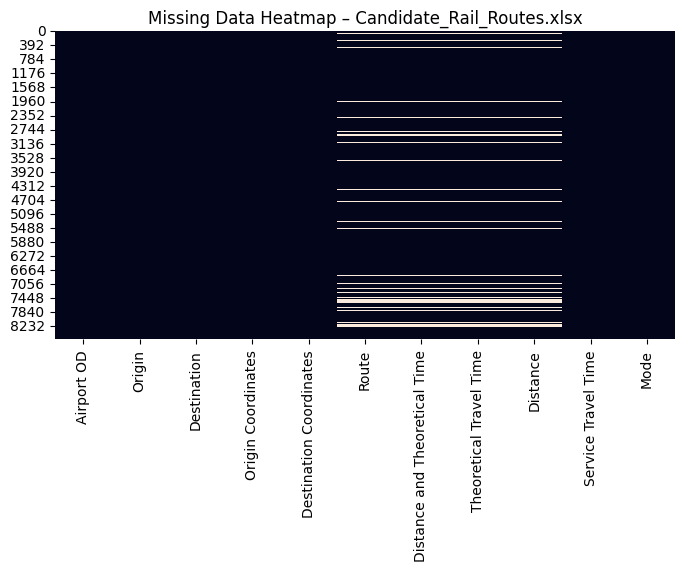


▶ Not enough numeric variables for a correlation matrix.

▶ Value Counts for Categorical Variables:

Variable: Airport OD
Airport OD
STN-AAL    3
GRZ-HAM    3
WAW-MUC    3
MUC-WAW    3
CTA-MUC    3
          ..
ZRH-ORK    1
MRS-ZRH    1
ZRH-MRS    1
SUF-ZRH    1
EGC-SOU    1
Name: count, Length: 5720, dtype: int64

Variable: Origin
Origin
London Stansted Airport         179
Barcelona-El Prat Airport       171
Málaga-Costa del Sol Airport    168
Amsterdam Airport Schiphol      166
Frankfurt Airport               158
                               ... 
Ostend                            1
Heringsdorf                       1
Pamplona                          1
Umeå                              1
Mo i Rana                         1
Name: count, Length: 330, dtype: int64

Variable: Destination
Destination
London Stansted Airport         179
Barcelona-El Prat Airport       171
Málaga-Costa del Sol Airport    168
Amsterdam Airport Schiphol      166
Frankfurt Airport               158
        

In [9]:
df = dataframes["Candidate_Rail_Routes.xlsx"]
describe_dataset(df, name="Candidate_Rail_Routes.xlsx")